<a href="https://colab.research.google.com/github/JosephineHebling/JosephineHebling/blob/main/hebling_josephine_final_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Novel Text Analysis on the Characteristics of UN Resolution Texts Adopted in the Security Council (2021)

##### Final Paper: Introduction to Text Analysis in Python
##### Instructor: Professor Rebecca Krisel
##### Course number: INAFU6502


##### Name: Josephine Hebling
##### Semester: Fall 2023

# 1. Introducution

This paper investigates a novel text analysis of resolution texts at the United Nations (UN). As resolution texts are the central outcome of the decision-making processes at the UN, it is crucial to understand both the characteristics and determinants of these documents.

In this research paper, I thus analyze the text of UN resolutions in the Security Council and assess to what extent broader patterns can be resognized across these decsions. In this paper, I assess the inner workings of the UN Security Council (UNSC) since it has the "primary responsibility for the maintenance of international peace and security. It has 15 Members, and each Member has one vote. Under the Charter of the United Nations, all Member States are obligated to comply with Council decisions." (UN Security Council 2023). It is therefore considered to be the most powerful organ internationally, specifically in the adoption of topics related to international peace and security efforts.


# 2. Methodology

## 2.1 Data Collection and Preparation

In order to assess the abovementioned research question, this paper thus procedes in the following steps, and centers around applying text analysis methodology in Python to analyze the respective documents and draw meaningful conclusions.

To limit the scope of this analysis, I restrict my assessment to UNSC resolutions adopted in the year 2021. Therefore, I draw from the GitHub respository provided by UNxml (2023) which provides machine-readable versions across several years worth of UNSC resolutions. This way, the text data analyzed is readable in the Python program and the tedious work of reading UN resolution from pdf texts can be circumvented.

## 2.2 Data Analysis

First, the aim of this analysis is the recognition of broader text patterns across all UNSC resolutions. This way, a general understanding of the determining characteristics of the texts can be gained, before further moving on with the analysis. Therefore, the methodology of this paper starts with topic models and addresses to what extent there is a broad trend of topics across UNSC resolutions, and how these relate to the work of the Council.

Second, I further procede by applying the text analysis method term frequency–inverse document frequency (TF-IDF). This way, the most distinctively frequent or significant words can be found for every respective UNSC resolution. I specifically calculate tf-idf scores using word frequencies per page—or "extracted features"—made available by the HathiTrust Digital Library.

The reason why I apply both topic models and TF-IDF text analysis methods to analyze the texts is centered around the language and tonality of UN resolutions themselves. More specifically, the UNSC resolutions are written in strong diplomatic language and thus are determined by changes in tone and wording typical in international law. For instance, the application of sentiment analysis would not allow for substatial conclusions, as it is a tool designed to evaluate phatic language, rather than the nuances among UN resolutions. Instead, both the topic models and TF-IDF text analysis metodology allows to understand the broader topics covered in the UN texts.


## 2.3 Data Preparation

#### Install Packages

In [15]:
!pip install tomotopy #install the tomotopy library

In [16]:
!pip install seaborn #I am also going to pip install the data visualization library seaborn:

### Import Packages

Now I am going to import `tomotopy` and the data viz library `seaborn`.

I am also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system.

Finally, I will also import `pandas` to organize our data and `NLTK` to clean and normalize our text

In [39]:
import tomotopy as tp
import seaborn
import glob
from pathlib import Path
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stops = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
pip install beautifulsoup4 #Install the BeautifulSoup library

In [20]:
from bs4 import BeautifulSoup

# 3. Data Analysis

## 3.1 Topic Modeling: Get Training Data From UN Resolution Text Files

The first part of my data analysis applied the text analysis method of *topic modeling*. This method will help identify the main topics or discourses within the collection of all respective UN resolutions texts adopted in 2021.

I am therefore heavily leaning on the tomotopy topic modeling workshop provided by Professor Rebecca Krisel (https://github.com/rskrisel/topic_modeling_workshop).

Before I topic model the UNSC resolution files, I need to process the text files and prepare them for analysis. The steps below demonstrate how to process texts since my corpus is a collection of separate text files.

To get the necessary text files, I am going to make a variable and assign it the file path for the directory that contains the text files.

In [29]:
directory = "2021_unsc_resolutions"

Then I am going to use the `glob.gob()` function to make a list of all (`*`) the `.txt` files in that directory.

In [30]:
files = glob.glob(f"{directory}/*.xml")

Notably, the machine-readable text data is in XML format, as it was downloaded individually from the UNxml repository on GitHub and it therefore difficult to read (available online via https://github.com/UNxml/SCresolutions).

I therefore run my text data through a BeautifulSoup object, apply the get_text function and further clean and cut the text data in the following. Lastly, I visualize my results of my topic models using the print function.


In [31]:
for file in files:
    text = open(file, encoding='utf-8').read()
    print(text)
#As we can see here, the xml format does not allow for a straightforward text analysis.
#The BeautifulSoup library is thus applied in the following fuction to clean the text.

<akomaNtoso xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://docs.oasis-open.org/legaldocml/ns/akn/3.0 http://docs.oasis-open.org/legaldocml/akn-core/v1.0/os/part2-specs/schemas/akomantoso30.xsd" xmlns="http://docs.oasis-open.org/legaldocml/ns/akn/3.0" xmlns:html="http://www.w3.org/1999/xhtml" xmlns:akn4un="http://un.org/akn4un">
  <!--This is an unofficial copy for informational purposes only and prepared from the official electronic file-->
  <statement name="resolution">
    <meta>
      <identification source="#DGACM">
        <FRBRWork>
          <FRBRthis value="/akn/un/statement/deliberation/unsc/2021-06-29/2584-2021/!main/"></FRBRthis>
          <FRBRuri value="/akn/un/statement/deliberation/unsc/2021-06-29/2584-2021/"></FRBRuri>
          <FRBRdate date="2021-06-29" name="adoption"></FRBRdate>
          <FRBRauthor href="sc" as="author"></FRBRauthor>
          <FRBRcountry value="un"></FRBRcountry>
        </FRBRWork>
        <FRBRExpression>
  

In [32]:
for file in files:
     text = open(file, encoding='utf-8').read()
     soup = BeautifulSoup(text)
     article = soup.get_text()
     print(article)

Streaming output truncated to the last 5000 lines.




















































CHINA
ESTONIA
FRANCE
IRELAND
MEXICO
NIGER
NORWAY
RUSSIAN FEDERATION
SAINT VINCENT AND THE GRENADINES
TUNISIA
UNITED KINGDOM
UNITED STATES
VIET NAM




INDIA
KENYA








































United Nations



S/RES/2577 (2021)



Security Council


Distr.: General


28 May 2021


		Resolution 2577 (2021)


Adopted by the Security Council on 28 May 2021





The Security Council,


 Recalling its previous resolutions, statements of its President, and press statements on the situation in South Sudan, 


 Affirming its support for the 2018 “Revitalised Agreement on the Resolution of the Conflict in the Republic of South Sudan” (the Revitalised Agreement), stressing that the peace process only remains viable with the full commitment by all parties, and welcoming in this regard encouraging developments in implementing the Revitalized Agreement, including reconstituting the Tran

Now, I further build my for loop, and save the text data as a .txt file:

In [33]:

with open("all_resolutions.txt", "w") as output_file:
    for filename in files:
        with open(filename, encoding='utf-8') as input_file:
            text = input_file.read()
            soup = BeautifulSoup(text, 'html.parser')
            article = soup.get_text()
            output_file.write(article)


In [35]:
! mkdir files #I create a new folder called "files" inside my directory.

Now I have created a single .txt file and cleaned the data successfully. However, for my data analysis I want to analyze the UN resolution texts individually. Therefore, I utilize the newly created "all_resolutions.txt" file and separate the individual texts from another.
In order to separate the texts from each other, I apply text recognition pattern techniques, specifically regex, and cut off each respective UNSC resolution text at the beginning and at the end.

In [36]:
#Import the necessary library.
import os

# Create a folder named 'Resolutions' if it doesn't exist
output_folder = 'Resolutions'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


# Read the entire content of 'all_resolutions.txt'
with open('all_resolutions.txt', 'r') as file:
    all_text = file.readlines()

# Define start delimiter and the minimum number of consecutive empty lines as the end delimiter
start_delimiter = "The Security Council,"  # All UNSC Resolutions start with the first line called "The Security Council,".
#I take advantage of this pattern and use it as a regex expression to identify the start of the documents.
min_empty_lines = 10
##The end delimiter are ten consecutive empty lines in the text document.
#This way, the Annexes are also excluded, and the end delimiter does not include unnecessary text.
#The effectiveness of these commands was checked manually acorss all UNSC resolutions, which have correctly specified their start and end points.


# Find indices where the start delimiter occurs
start_indices = [i for i, line in enumerate(all_text) if start_delimiter in line]

# Extract sections between start and end delimiters
documents = []
for start_idx in start_indices:
    end_idx = next((i for i, line in enumerate(all_text[start_idx:], start=start_idx + 1) if all(line.strip() == '' for line in all_text[i:i + min_empty_lines])) or len(all_text), None)
    if end_idx is not None:
        document = ''.join(all_text[start_idx:end_idx])
        documents.append(document.strip())

# Save each document as a separate .txt file
for i, doc in enumerate(documents, start=1):
    # Define the filename for each document (e.g., resolution_1.txt, resolution_2.txt, ...)
    filename = f"{output_folder}/resolution_{i:02}.txt"
    with open(filename, 'w') as output_file:
        output_file.write(doc)

#Note that this code chunk was created with the help of ChatGPT. See documentation for more details.

In [37]:

# Define the file path
res_10 = "Resolutions/resolution_10.txt"

# Read the contents of the file and print it
with open(res_10, 'r') as file:
    content = file.read()
    print(content)

#This is an example of how the cleaned, shortened, and revised the respective resolution.
#The .txt files are now ready to analyze in the following steps.
#In this example, I show the Resolution #10.

The Security Council,


 Recalling its resolutions 2286 (2016) and 2532 (2020) and General Assembly resolutions 74/270 and 74/274, 


 Reaffirming that combating and sustainably recovering from the coronavirus disease (COVID-19) pandemic requires greater national, regional, and international cooperation and solidarity, and a coordinated, inclusive, comprehensive and global international response with the United Nations (UN) playing a key role, 


 Recognising that armed conflicts can exacerbate the COVID-19 pandemic, and that inversely the pandemic can exacerbate the adverse humanitarian impact of armed conflicts, as well as exacerbating inequalities, and expressing concern that the call for a general and immediate cessation of hostilities contained in its resolution 2532 (2020) was not fully heeded, 


 Recalling the obligations under the International Health Regulations (2005) and applicable international law,


 Emphasising the unity, common origin and solidarity of mankind, and the

## 3.2 Running the Topic Models

### 3.2.1 Train the Topic Models

Next I process our texts with the function `little_mallet_wrapper.process_string()`.

This function takes every individual text file, transform all the text to lowercase as well as remove stopwords, punctuation, and numbers, and then add the processed text to our master list `training_data`.

In [40]:
training_data = []
original_texts = []
titles = []

#Change the directory of the files:
directory = "Resolutions"

files = glob.glob(f"{directory}/*.txt")

for file in files:
    text = open(file, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalpha()]
    text_stops = [t for t in text_lower if t not in stops]
    text_string = ' '.join(text_stops)
    training_data.append(text_string)
    original_texts.append(text)
    titles.append(Path(file).stem)

In [41]:
len(training_data), len(original_texts), len(titles) #Check the number of the individual documents to make sure it is complete.

(55, 55, 55)

In [42]:
#Next, we train the topic models in the following code:

# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 5

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after removing white space (strip)
# and splitting it up into words (split)
for text in training_data:
    model.add_doc(text.strip().split())

# The log-likelihood function is typically used to
# derive the maximum likelihood estimator of the parameter
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -8.152224594908745
Iteration: 10	Log-likelihood: -7.8494857355115135
Iteration: 20	Log-likelihood: -7.745890184166672
Iteration: 30	Log-likelihood: -7.699561949766259
Iteration: 40	Log-likelihood: -7.657708250490423
Iteration: 50	Log-likelihood: -7.6262308579504205
Iteration: 60	Log-likelihood: -7.619241368118578
Iteration: 70	Log-likelihood: -7.611646198373287
Iteration: 80	Log-likelihood: -7.591780800907582
Iteration: 90	Log-likelihood: -7.595098352820675

Topic Model Results:


✨Topic 0✨

international security arms national regional

✨Topic 1✨

resolution security council support recalling

✨Topic 2✨

somalia fgs somali amisom including

✨Topic 3✨

united ensure nations security personnel

✨Topic 4✨

sudan humanitarian south panel experts

✨Topic 5✨

implementation full peace parties agreement

✨Topic 6✨

including armed support conflict violence

✨Topic 7✨

including relevant unifil related isil

✨Topic 8✨

committee states me

### 3.2.2 Load the Topic Distributions

In [43]:
#Next, we load the topic distributions
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

Next, I make functions for displaying top documents. The `get_top_docs()` function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)

In [44]:
from IPython.display import Markdown, display
# IPython means interactive Python. It is an interactive command-line terminal for Python.
import re
# A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
# RegEx can be used to check if a string contains the specified search pattern.

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=55):
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [45]:
#Display the top titles
get_top_docs(titles, topic_distributions, topic_index=0, n=3)

### ✨Topic 0✨

international security arms national regional

---

✨  
**Topic Probability**: 0.30313271284103394  
**Document**: resolution_54



✨  
**Topic Probability**: 0.2990753948688507  
**Document**: resolution_17



✨  
**Topic Probability**: 0.2754400968551636  
**Document**: resolution_31



In [46]:
get_top_docs(titles, topic_distributions, topic_index=1, n=3)

### ✨Topic 1✨

resolution security council support recalling

---

✨  
**Topic Probability**: 0.6781976819038391  
**Document**: resolution_39



✨  
**Topic Probability**: 0.6592703461647034  
**Document**: resolution_42



✨  
**Topic Probability**: 0.502579391002655  
**Document**: resolution_45



Display the top UN resolutions with topic words bolded

In [47]:
get_top_docs(original_texts, topic_distributions, topic_index=1, n=3)

### ✨Topic 1✨

resolution security council support recalling

---

✨  
**Topic Probability**: 0.6781976819038391  
**Document**: The Security Council,


 Recalling its **resolution** 1970 (2011) and all its subsequent resolutions on Libya, including resolutions 2259 (2015), 2510 (2020), 2542 (2020) and 2570 (2021), 


 Recalling its determination in its **resolution** 2213 (2015) that the situation in Libya continues to constitute a threat to international peace and **security**,




1.

 Decides to extend until 30 September 2021 the mandate of the United Nations Support Mission in Libya, as an integrated special political mission to carry out its mandate, as set out in resolution 2542 (2020) and paragraph 16 of resolution 2570 (2021);



2.

 Decides to remain actively seized of the matter.



✨  
**Topic Probability**: 0.6592703461647034  
**Document**: The Security Council,


 Recalling its **resolution** 1970 (2011) and all its subsequent resolutions on Libya, including resolutions 2259 (2015), 2510 (2020), 2542 (2020) and 2570 (2021), 


 Recalling its determination in its **resolution** 2213 (2015) that the situation in Libya continues to constitute a threat to international peace and **security**,




1.

 Decides to extend until 31 January 2022 the mandate of the United Nations Support Mission in Libya, as an integrated special political mission to carry out its mandate, as set out in resolution 2542 (2020) and paragraph 16 of resolution 2570 (2021);



2.

 Decides to remain actively seized of the matter.



✨  
**Topic Probability**: 0.502579391002655  
**Document**: The Security Council,


 Recalling its resolutions 2240 (2015), 2312 (2016), 2380 (2017), 2437 (2018), 2491 (2019) and 2546 (2020) and its Presidential Statement of 16 December 2015 (S/PRST/2015/25), 


 Reaffirming its strong commitment to the sovereignty, independence, territorial integrity and national unity of Libya, 


 Welcoming the Secretary-General’s report of 2 September 2021 (S/2021/767) including its observations on the plight of migrants and refugees in Libya, 


 Mindful of its primary responsibility for the maintenance of international peace and **security** under the Charter of the United Nations, 


 Welcoming the measures that have been taken to implement **resolution** 2240 (2015) encouraging their continuation, and taking note of Operation EUNAVFOR MED Irini in this regard, 


 Reaffirming the necessity to put an end to the ongoing proliferation of, and endangerment of lives by, the smuggling of migrants and trafficking of persons in the Mediterranean Sea off the coast of Libya, and, for these specific purposes, acting under Chapter VII of the Charter of the United Nations, 




1.

 Condemns all acts of migrant smuggling and human trafficking into, through and from the Libyan territory and off the coast of Libya, which undermine further the process of stabilisation of Libya and endanger the lives of hundreds of thousands of people; 



2.

 Decides to renew the authorisations as set out in paragraphs 7, 8, 9 and 10 of **resolution** 2240 (2015), for a further period of twelve months from the date of adoption of this resolution, reaffirms paragraph 11 thereof and reiterates its resolutions 2240 (2015), 2312 (2016), 2380 (2017), 2437 (2018), 2491 (2019) and 2546 (2020) and its Presidential Statement S/PRST/2015/25; 



3.

 Renews the reporting requests set out in paragraph 17 of its resolution 2240 (2015) from the date of adoption of this resolution, and requests the Secretary-General to report to the Security Council eleven months after the adoption of this resolution on its implementation, in particular with regard to the implementation of paragraphs 7 to 10 of its resolution 2240 (2015);



4.

 Expresses its intention to continue to review the situation and consider, as appropriate, renewing the authority provided in this resolution for additional periods; 



5.

 Decides to remain seized of the matter.



### 3.2.3 Visualize the Topic Model Results

In the following, I make a heatmap to visualize the results of running the topic models. This function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L171)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [49]:
target_labels = titles #Specify the labels

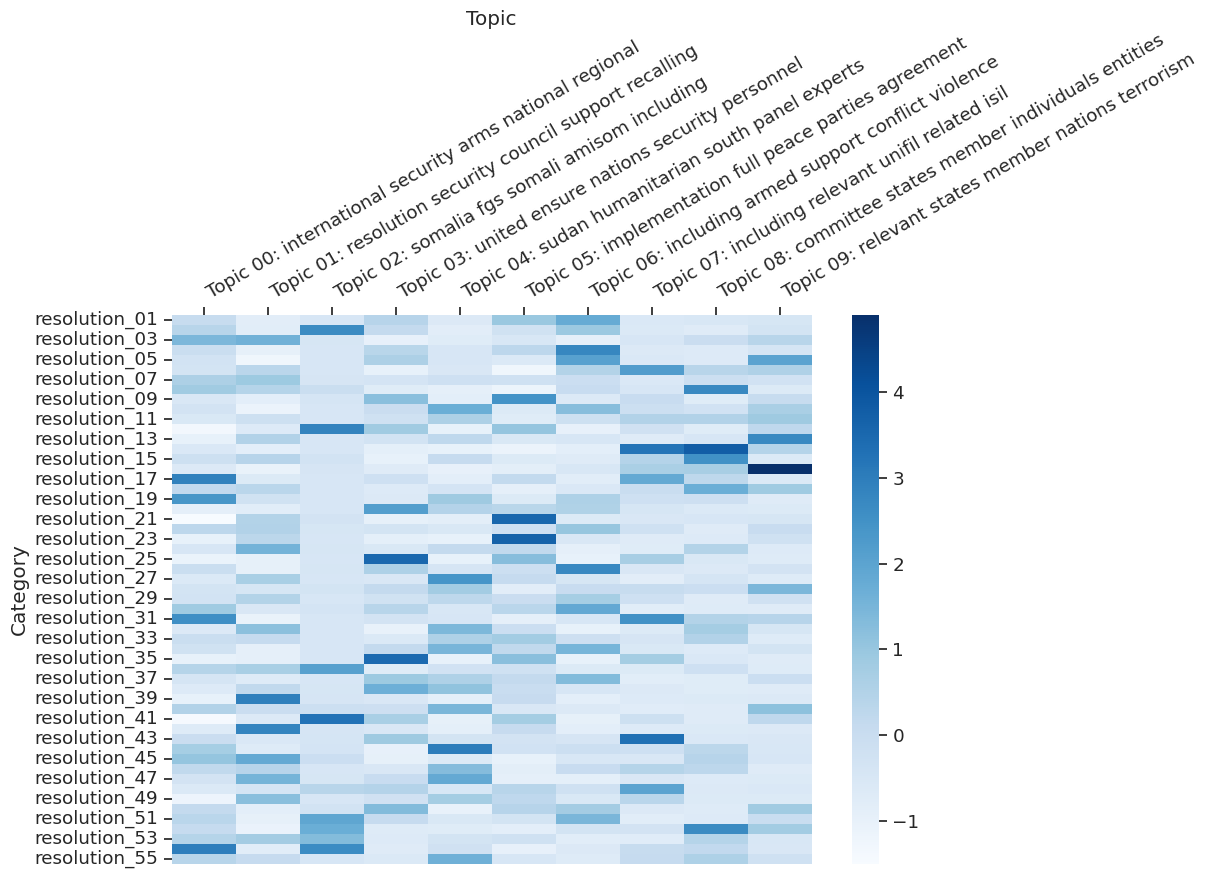

In [50]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))
#Display the heat map

The visualization of the Topic Model results shows that there is not overarching pattern to be found in which specific topics are discussed more frequently. Instead, there seems to be a general discussion of issues related to international peace and security, such as humanitarian action (Topic 0), international law (Topic 01), terrorism (Topic 03), and arms and weapons (Topic 06).

These results show that particular resolutions discuss issues related to particular countries (see Topic 05 and 07), whereas the common demoninator across all resolutions tend to be general peace and security related issues.

These findings are interesting, as they show that there is a general pattern to be found across all UNSC resolutions, as they are connected through common themes. In the following, however, I further investigate to what extent the text analysis methodology can be refined to find topics which are more specific to the individual resolutions.

### 3.2.4 Save the Results

In [51]:
#Here, I save the results of the topic models as .csv file.

topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')
df.to_csv('Topic-Distributions.csv', encoding='utf-8', index=False)

In [52]:
#To inspect the data, the following code can be run:
df

,document,Topic 0 international security arms national,Topic 1 resolution security council support,Topic 2 somalia fgs somali amisom,Topic 3 united ensure nations security,Topic 4 sudan humanitarian south panel,Topic 5 implementation full peace parties,Topic 6 including armed support conflict,Topic 7 including relevant unifil related,Topic 8 committee states member individuals,Topic 9 relevant states member nations
0,resolution_41,0.012695,0.117581,0.302175,0.179116,0.011728,0.236454,0.008031,0.047815,0.001853,0.082553
1,resolution_12,0.019148,0.112024,0.268852,0.194632,0.006942,0.266893,0.004831,0.043440,0.000355,0.082883
2,resolution_24,0.075382,0.462195,0.001980,0.052253,0.103789,0.173040,0.008953,0.006229,0.110749,0.005430
3,resolution_47,0.085596,0.457051,0.002614,0.110746,0.248389,0.047471,0.011820,0.022144,0.006998,0.007168
4,resolution_14,0.067647,0.080644,0.000189,0.015268,0.007453,0.023773,0.015410,0.282043,0.407251,0.100323
5,resolution_01,0.110026,0.086111,0.000039,0.149667,0.038620,0.256878,0.294798,0.017392,0.022719,0.023750
6,resolution_30,0.162837,0.134256,0.007925,0.147221,0.049745,0.186224,0.302048,0.002037,0.005767,0.001940
7,resolution_04,0.103383,0.066890,0.000032,0.145748,0.051396,0.183116,0.398419,0.015425,0.006726,0.028864
8,resolution_48,0.066707,0.156581,0.068455,0.155336,0.050130,0.193614,0.086484,0.197587,0.011036,0.014071
9,resolution_39,0.040669,0.678198,0.003555,0.055936,0.015951,0.159180,0.016071,0.011181,0.009515,0.009746


Note that I have re-run the topic models by further shortening the UN resolution texts to investigate whether the results change significantly if only the Operative Clauses are analyzed of UNSc resolutions.
The Operative Clauses only include the texts upon which the member states have agreed, for which is makes up the core of the binding decision of the texts.

Re-running the analyses provides a more detailed assessment of the decisions conceptually, as this is the most relevant, legally binding section of the texts under international law. These provude thus a more precise measurement of the concept I aim to capture in this research paper.

However, by excluding the Preambular Phrases of the UNSC resolutions, meaningful topics get lost. This is also reflected in the results of the topic models, which are less explicit in estimating the specific topics of the UNSC resolutions adopted.
Therefore, a central preliminary conclusion of this analysis is that the main topics of UNSC resolutions are highlighted in the Preambular Phrases of the text, rather than the Operative Phrases.

Overall, this conclusion is coherent, as the legally bindig nature of the Operative Phrases seems to lead UN member states to refrain from using strong language. Instead, broader and more general terms tend to be used in the Operative Phrases, whereas the Preambular Phrases mention the topics discussed in the UNSC resolution, as well as previous conferences and decisions that were adopted.

In conduction text analyses of UNSC resolutions, it is thus more meaningful to include the entirety of resolution texts, rather than shortening them.

The code and respective output of these analyses which purly focus on the Operative Clauses of UNSC resolutions can be found in the Annex.

# 3.3 Term Frequency - Inverse Document Frequency (TF-IDF)

In [53]:
!pip install sklearn #Install the necessary sklearn library

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [54]:
#Import the necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.options.display.max_rows = 600
from pathlib import Path
import glob


In [55]:
#Set directory path:
directory_path = "Resolutions"


In [56]:
#Then I am going to use glob and Path to make a list of all the filepaths in that directory and a create list of all the resolution titles.

text_files = glob.glob(f"{directory_path}/*.txt")
text_files
text_titles = [Path(text).stem for text in text_files]
text_titles

['resolution_41',
 'resolution_12',
 'resolution_24',
 'resolution_47',
 'resolution_14',
 'resolution_01',
 'resolution_30',
 'resolution_04',
 'resolution_48',
 'resolution_39',
 'resolution_40',
 'resolution_17',
 'resolution_08',
 'resolution_26',
 'resolution_38',
 'resolution_16',
 'resolution_35',
 'resolution_06',
 'resolution_43',
 'resolution_37',
 'resolution_45',
 'resolution_49',
 'resolution_50',
 'resolution_07',
 'resolution_10',
 'resolution_13',
 'resolution_25',
 'resolution_02',
 'resolution_52',
 'resolution_34',
 'resolution_54',
 'resolution_20',
 'resolution_33',
 'resolution_19',
 'resolution_29',
 'resolution_51',
 'resolution_46',
 'resolution_36',
 'resolution_28',
 'resolution_44',
 'resolution_42',
 'resolution_22',
 'resolution_55',
 'resolution_15',
 'resolution_27',
 'resolution_11',
 'resolution_53',
 'resolution_32',
 'resolution_21',
 'resolution_18',
 'resolution_03',
 'resolution_09',
 'resolution_05',
 'resolution_31',
 'resolution_23']

## 3.3.1 Calculate TF-IDF

To calculate tf–idf scores for every word, I am going to use scikit-learn's TfidfVectorizer.

When I initialize TfidfVectorizer, I choose to set it with the default parameters. These parameters change the way you calculate tf–idf.

I therefore run TfidfVectorizer is with smoothing (smooth_idf = True) and normalization (norm='l2') turned on. These parameters will better account for differences in text length, and overall produce more meaningful tf–idf scores.

I first initialize TfidfVectorizer with the following parameters: input = 'filename' because I am iterating across a list of files, and stop_words='english' to apply the english language list of stop words.


In [57]:
#!fidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')
#tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

#Run TfidfVectorizer on our text_files and apply the fit_transform function to convert the data into a matrix format necessary to perform the tf-idf calculations
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)
type(tfidf_vector)



scipy.sparse._csr.csr_matrix

In [58]:
#I make a DataFrame out of the resulting tf–idf vector, applying the toarray() function to transform the matrix into a format that can become a dataframe, setting the index equal to the list of titles, and the columns equal "feature names" or words as columns using the tfidf_vectorizer.get_feature_names_out() function

tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())
#Add column for document frequency to note the number of times word appears in all documents

tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

In [59]:
#create a slice of the dataframe to target specific words that are of interest. Then sort the sliced dataframe by the index and round the decimals to two

tfidf_slice = tfidf_df[['peace', 'security']] #Here, I investigate the particular words "peace" and "security".
tfidf_slice.sort_index().round(decimals=2)

,peace,security
00_Document Frequency,48.00,55.00
resolution_01,0.03,0.09
resolution_02,0.02,0.14
resolution_03,0.09,0.15
resolution_04,0.06,0.08
resolution_05,0.02,0.03
resolution_06,0.02,0.04
resolution_07,0.02,0.05
resolution_08,0.00,0.11
resolution_09,0.00,0.03


In [60]:
#Then I drop "OO_Document Frequency" since I was just using it for illustration purposes.

tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')

In [61]:
#Use the stack function to reorganize the DataFrame so that the words are in rows rather than columns. I need to reset the index to make sure the results became a dataframe and not a series object

tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.stack().reset_index()

In [62]:
#Rename the columns

tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term'})

In [63]:
#To find out the top 10 words with the highest tf–idf for every story, I am going to sort by document and tfidf score and then groupby document and take the first 10 values.

tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)


In [64]:
#I zoom in on particular words and particular documents here, specifically "peace" and "security".
top_tfidf[top_tfidf['term'].str.contains('peace')]

,document,term,tfidf
259404,resolution_21,peace,0.120106
291372,resolution_23,peace,0.128323
35628,resolution_30,peace,0.115081
120876,resolution_50,peace,0.222520
120883,resolution_50,peacekeeping,0.187497
120878,resolution_50,peacebuilding,0.172585


In [65]:
top_tfidf[top_tfidf['term'].str.contains('security')]

,document,term,tfidf
148354,resolution_02,security,0.141470
270898,resolution_03,security,0.153974
41794,resolution_04,security,0.079655
265570,resolution_18,security,0.104803
169666,resolution_20,security,0.081045
73762,resolution_26,security,0.095275
36466,resolution_30,security,0.101524
201634,resolution_36,security,0.136597
79090,resolution_38,security,0.130657
121714,resolution_50,security,0.144647


It turns out that neither the term "peace", nor "security" is very distinctive for any particular resolution.
Instead, these topics are characterized similarly across all UNSC resolutions adopted in 2021.

For instance, the term "peace" has a tfidf score between 0.07 and 0.22.
Further, the term "security" has a tfidf score between 0.08 and 0.14 across the selected UNSC resolutions.

The scores of these general terms are thus not very high, yet quite consistent across all resolutions.

## 3.3.2 Visualize TF-IDF Scores

Next, I visualize our TF-IDF results with the data visualization library Altair.

In [66]:
!pip install altair

In [67]:
#I therefore make a heatmap that shows the highest TF-IDF scoring words for each UN resolution.
#Since the topic models and initial TF-IDF results conclude that "conflit", "peace", and "security" are common themes across all UN resolutions, I mark these terms with a red dot.

#The code below was contributed by Eric Monson. Thanks, Eric!

import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
#I decided to mark the general, broader terms with a red dot to distinguish them more easily.
#These broader terms either refer to themes dealt with by the UNSC (conflict, peace, security) or pertain to the decision-making process of the UNSC itself (resultion, government, agreement).
term_list = ['conflict', 'peace', 'security', 'resolution', 'government', 'agreement']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

The heatmap shows how well TF-IDF models are suited to understand both the broader topics covered across all UNSC resolutions, and the specific issues discussed in every resolution individually.

Interestingly, none of the common themes show up as the most highly ranked TF-IDF score for any resolution. Instead, the words with the highest TF-IDF rank typically have scores above 0.4 and either relate to individual country-situations (Somalia, Afghanistan, Colombia, Sudan, Libya, Yemen, Iraq) or to a particular entity or organization related to international security discussed (NATO, UNDOF, MINUSMA, UNISFA).

Insterestingly, COVID as a security-related issues was also correctly identified as the most important issue in resolution #28.

In contrast to the most highly ranked and specific terms discussed (which tend to have a TF-IDF Score above 0.4), the broader topics identified through the topic models rank below 0.4. Strikingly, there is a large share of UNSC resolutions in which these terms are identified with the TF-IDF Model, yet they do not rank high. This is very coherent with the overall intuition behind these documents, as common themes, such as international peace and security, combine these documents.

In addition, the TF-IDF Model was yet able to distinguish more clearly between individual topics that were discussed in the respective resolutions, such as UN Peacekeeping Missions, country-specific situations, or related issues such as COVID and embargoes.

# 4. Conclusion

In summary, it is clear that it is possible to determine both which broader patterns and specific issues are discussed in UNSC resolutions. Generally, all UNSC Resolutions are connected by common themes, such as peace and security, humanitarian action, and UN Missions. These broad themes are identified in the topic models, and TF-IDF Models.

Interestingly, text analysis methods are better at identifying resolition topics and themes if both the Preambular Phrases and Operative Phrases are included. If only the Operative Phrases are included, which contain the text in which the member states commit to action, then the text is more general, and diplomatic.

Instead, the recognition of topics is more meaningful if the UNSC resolution texts are analyzed in their entirety. This way, the broad patterns and specific topics are quite precisely estimated based on the TF-IDF Models. This is also reflected in the final heatmap, which is visualized in the section above.

Overall, the identification of the topics discussed in UNSC Resolution is further relevant, as it inherently links to the preferences of UNSC member states, reflected in their voting behavior. For instance, the UNSC resolutions which are highly contested related to matters on the Middle East, and are commonly vetoed by either the US, China, or the Russian Federation (UN Security Council 2023).

The identification of reoslution topics is thus highly relevant towards understanding the preferences of UNSC members, and understanding their voting behavior in the Council. This way, we are one step closer towards understanding the underlying mechanisms of topics disucssed in the most powerful international organ on issues related to peace and security.

# References

Krisel, Rebecca (2023): Intro to NLTK. Introduction to Text Analysis. Columbia SIPA. Last updated in September 2023. Available online via https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb

Krisel, Rebecca (2023): TF-IDF with Scikit-Learn. Introduction to Text Analysis. Columbia SIPA. Last updated in September 2023. Available online via https://github.com/rskrisel/tf-idf/blob/main/README.md#tf-idf-with-scikit-learn

Krisel, Rebecca (2023): Topic Modeling - With Tomotopy. Introduction to Text Analysis. Columbia SIPA. Last updated in September 2023. Available online via https://github.com/rskrisel/topic_modeling_workshop

UNxml (2023): Machine-Readable UNSC Resolutions. Available online via https://github.com/UNxml/SCresolutions/tree/main

UN Security Council (2023): Vetoes since 1946. United Nations. Available online via https://research.un.org/en/docs/sc/quick. Last updated on December 8th, 2023.


# Acknowledgements

This curriculum is copied from [Melanie Walsh's *Introduction to Cultural Analytics & Python*](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/09-Topic-Modeling-Without-Mallet.html). However, the dataset is different. This script uses the UNSC resolutions corpus, which is available for download [here](https://github.com/UNxml/SCresolutions/tree/main).

This curriculum is copied from Melanie Walsh's Introduction to Cultural Analytics & Python. However, the dataset is different. This script uses the UNSC resolutions corpus, as provided by the UNxml GitHub repotitory which is availalbe [here](https://github.com/UNxml/SCresolutions/tree/main)

I also use NLTK instead of using little_mallet_wrapper to clean and normalize my text.


# ANNEX
## Running Topic Models Only with the Operative Clauses of UNSC Resolutions

In [68]:
#Now the starting delimiter is "1." and I use the regex expressions for pattern recognition:

import os

# Create a folder named 'Resolutions' if it doesn't exist
output_folder = 'Resolutions_OP'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

import re

# Read the entire content of 'all_resolutions.txt'
with open('all_resolutions.txt', 'r') as file:
    all_text = file.readlines()

# Define start delimiter and the minimum number of consecutive empty lines as the end delimiter
start_delimiter = "1."  # Replace this with your start delimiter
min_empty_lines = 10

# Define pattern for start delimiter using regular expression
#pattern = re.compile(rf"^{re.escape(start_delimiter)} ")
pattern = re.compile(rf"^1.\s*$")

# Find indices where the start delimiter occurs
start_indices = [i for i, line in enumerate(all_text) if pattern.match(line)]

# Extract sections between start and end delimiters
documents = []
for start_idx in start_indices:
    end_idx = next((i for i, line in enumerate(all_text[start_idx:], start=start_idx + 1) if all(line.strip() == '' for line in all_text[i:i + min_empty_lines])) or len(all_text), None)
    if end_idx is not None:
        document = ''.join(all_text[start_idx:end_idx])
        documents.append(document.strip())

# Save each document as a separate .txt file
for i, doc in enumerate(documents, start=1):
    # Define the filename for each document (e.g., resolution_1.txt, resolution_2.txt, ...)
    filename = f"{output_folder}/resolution_{i:02}.txt"
    with open(filename, 'w') as output_file:
        output_file.write(doc)

Topic Model Training...


Iteration: 0	Log-likelihood: -8.014021046321712
Iteration: 10	Log-likelihood: -7.735489427770489
Iteration: 20	Log-likelihood: -7.6422835691860085
Iteration: 30	Log-likelihood: -7.595138740367075
Iteration: 40	Log-likelihood: -7.559179710603258
Iteration: 50	Log-likelihood: -7.537104745632591
Iteration: 60	Log-likelihood: -7.523546763458593
Iteration: 70	Log-likelihood: -7.515073801124857
Iteration: 80	Log-likelihood: -7.4890887804767
Iteration: 90	Log-likelihood: -7.489440641269632

Topic Model Results:


✨Topic 0✨

security arms equipment partners amisom weapons union african military training

✨Topic 1✨

panel experts committee reaffirms military paragraph requests regarding use later

✨Topic 2✨

resolution implementation support mandate measures requests decides including report council

✨Topic 3✨

including support international violence rights human authorities sexual violations car

✨Topic 4✨

sudan request south team paragraph unisfa delisting mission 

### ✨Topic 0✨

security arms equipment partners amisom weapons union african military training

---

✨  
**Topic Probability**: 0.5539910793304443  
**Document**: resolution_55



✨  
**Topic Probability**: 0.5422117710113525  
**Document**: resolution_56



✨  
**Topic Probability**: 0.440639853477478  
**Document**: resolution_57



### ✨Topic 1✨

panel experts committee reaffirms military paragraph requests regarding use later

---

✨  
**Topic Probability**: 0.41949617862701416  
**Document**: resolution_57



✨  
**Topic Probability**: 0.3785366415977478  
**Document**: resolution_56



✨  
**Topic Probability**: 0.3682539761066437  
**Document**: resolution_55



### ✨Topic 2✨

resolution implementation support mandate measures requests decides including report council

---

✨  
**Topic Probability**: 0.6672168374061584  
**Document**: resolution_46



✨  
**Topic Probability**: 0.6070519685745239  
**Document**: resolution_24



✨  
**Topic Probability**: 0.5453127026557922  
**Document**: resolution_39



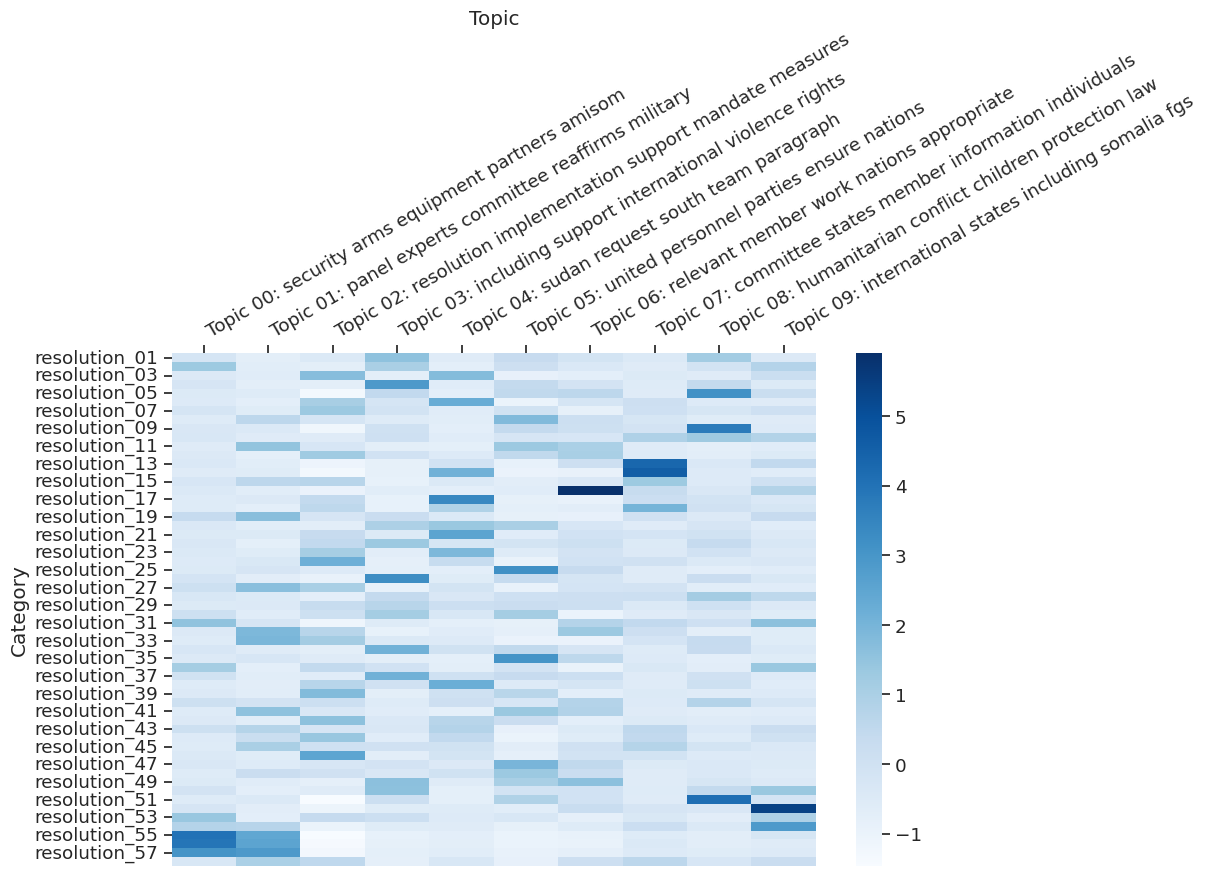

In [69]:
#Re-run the codes including the topic models:

training_data = []
original_texts = []
titles = []

#Change the directory of the files:
directory = "Resolutions_OP"

files = glob.glob(f"{directory}/*.txt")

for file in files:
    text = open(file, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalpha()]
    text_stops = [t for t in text_lower if t not in stops]
    text_string = ' '.join(text_stops)
    training_data.append(text_string)
    original_texts.append(text)
    titles.append(Path(file).stem)

len(training_data), len(original_texts), len(titles)

#Train Topic Model:

# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after removing white space (strip)
# and splitting it up into words (split)
for text in training_data:
    model.add_doc(text.strip().split())

# The log-likelihood function is typically used to
# derive the maximum likelihood estimator of the parameter
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

from IPython.display import Markdown, display
# IPython means interactive Python. It is an interactive command-line terminal for Python.
import re
# A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
# RegEx can be used to check if a string contains the specified search pattern.

def make_md(string):
    display(Markdown(str(string)))

#

def get_top_docs(docs, topic_distributions, topic_index, n=55):
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

#Display topic titles:

get_top_docs(titles, topic_distributions, topic_index=0, n=3)
get_top_docs(titles, topic_distributions, topic_index=1, n=3)
get_top_docs(titles, topic_distributions, topic_index=2, n=3)

#Make the Heatmap:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()

#Specify the labels of the heatmap
target_labels = titles

#Plot the heatmap

plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))